In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [2]:
df = pd.read_csv("wayangData.csv", sep=";")

In [7]:
print(df.head())
print(df.columns)

                                            sentimen    label
0  Bambang Gandawardaya ternyata sangat sakti dan...  positif
1  Patih Sangkuni berkata bahwa Raden Premadi sud...   netral
2           Akal licik Patih Sangkuni segera bekerja  negatif
3  Danghyang Druna dan Adipati Karna tidak setuju...  negatif
4  Ini adalah kesempatan untuk mengadu domba anta...  negatif
Index(['sentimen', 'label'], dtype='object')


In [16]:
X = df['sentimen']
y = df['label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y )

In [18]:
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2)) 
X_train_tfidf = vectorizer.fit_transform(X_train) 
X_test_tfidf = vectorizer.transform(X_test)

In [19]:
clf = LinearSVC()
clf.fit(X_train_tfidf, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [20]:
y_pred = clf.predict(X_test_tfidf)

In [21]:
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.36363636363636365

Classification Report:
               precision    recall  f1-score   support

     negatif       0.43      0.60      0.50         5
      netral       1.00      0.50      0.67         2
     positif       0.00      0.00      0.00         4

    accuracy                           0.36        11
   macro avg       0.48      0.37      0.39        11
weighted avg       0.38      0.36      0.35        11



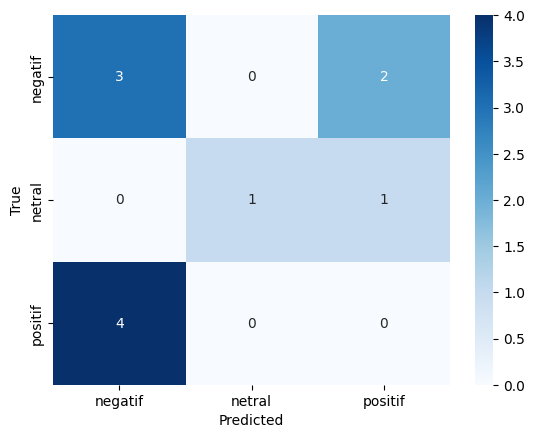

In [22]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=clf.classes_, yticklabels=clf.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [23]:
pickle.dump(clf, open("svm_wayang_sa", "wb"))
pickle.dump(vectorizer, open("tfidf_wayang_sa", "wb"))